In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.count(axis='columns')

0      5
1      5
2      5
3      5
4      5
      ..
195    5
196    5
197    5
198    5
199    5
Length: 200, dtype: int64

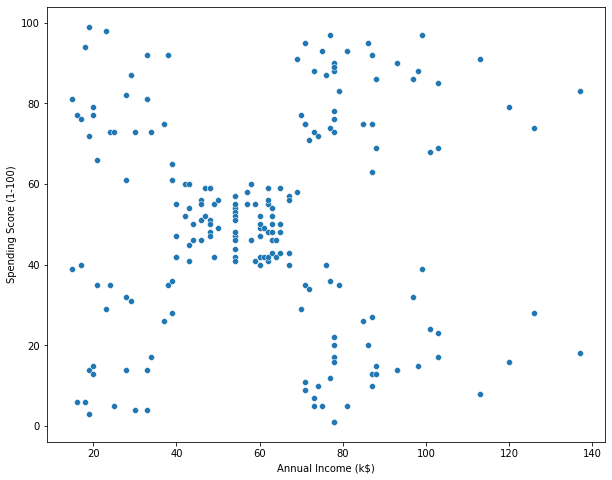

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = df['Annual Income (k$)'],y = df['Spending Score (1-100)'])
plt.show()

<AxesSubplot:>

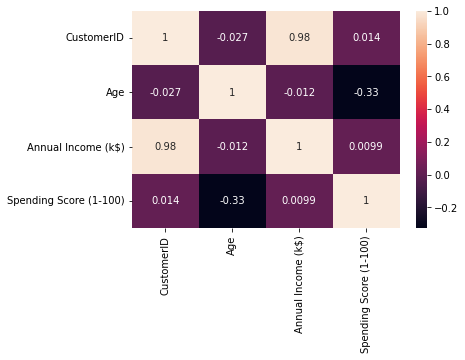

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
import scipy.cluster.hierarchy as sch

In [10]:
df1 = df;
link = df1.iloc[:,[3,4]].values

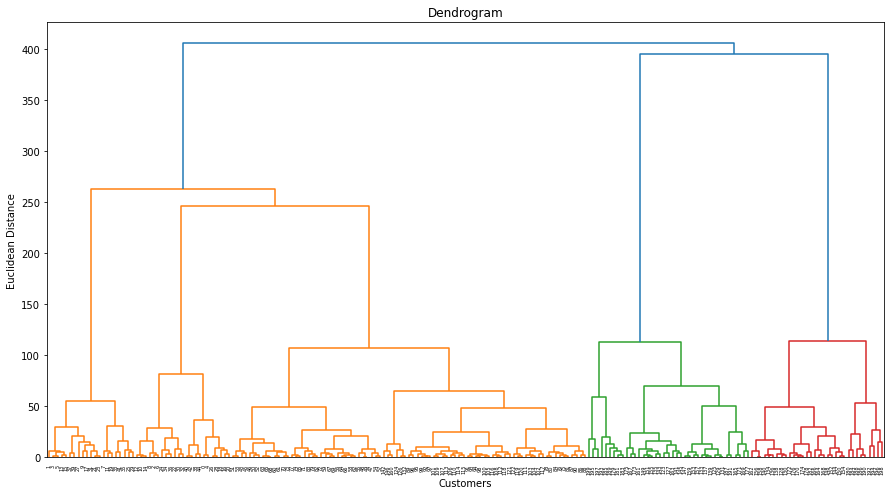

In [11]:
plt.figure(figsize=(15,8))
dendro = sch.dendrogram(sch.linkage(link,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df1['label'] = cluster.fit_predict(link)

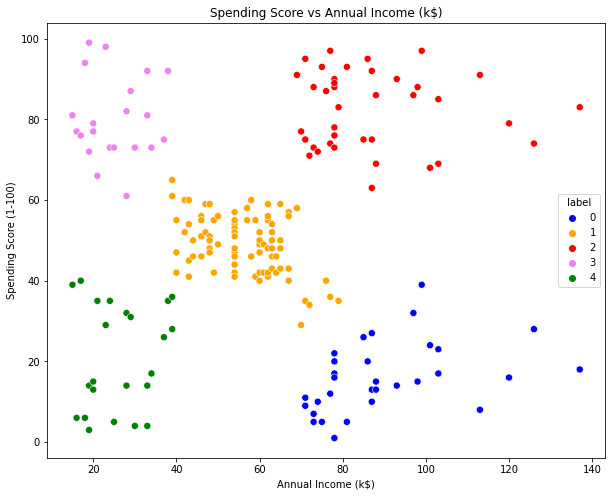

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue='label',
palette=['blue', 'orange', 'red', 'violet', 'green'], data=df1, s=50)
plt.title('Spending Score vs Annual Income (k$)')
plt.show()